<a href="https://colab.research.google.com/github/zaenalSamsul/UTS_PENGOLAHAN_CITRA/blob/main/Image_Konvulusi_UTS_No_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Konvulusi

Silakan unggah file gambar...


Saving Seminar.jpg to Seminar (4).jpg


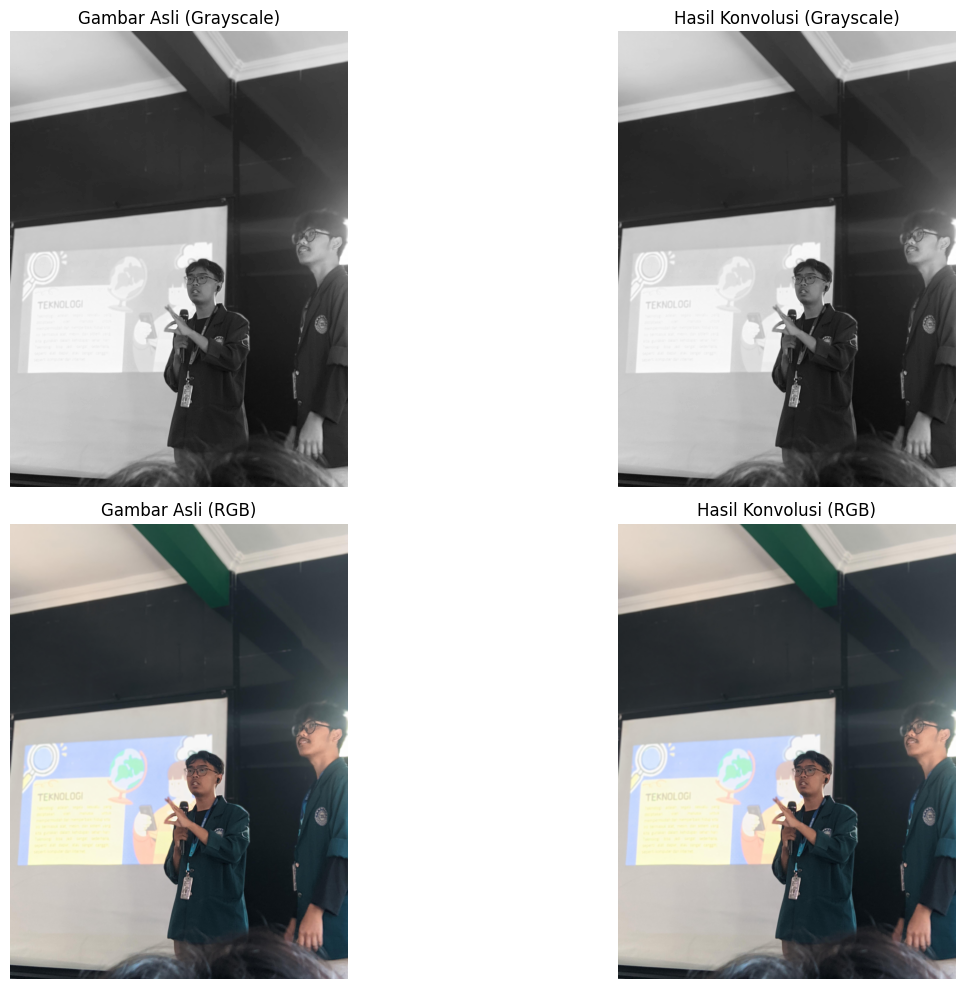

Efek setelah konvolusi:
1. Penghalusan gambar, mengurangi detail dan noise.
2. Tepi gambar menjadi lebih halus atau kabur.
3. Gambar terlihat lebih lembut dibandingkan gambar asli.


In [6]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Unggah gambar
print("Silakan unggah file gambar...")
uploaded = files.upload()  # Mengunggah file gambar

# 2. Pastikan file diunggah
if not uploaded:
    print("Error: Tidak ada file yang diunggah.")
else:
    # Mendapatkan nama file yang diunggah
    image_path = next(iter(uploaded.keys()))

    # 3. Baca gambar
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_rgb = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

    if image_gray is None or image_rgb is None:
        print("Error: Gambar tidak valid atau tidak ditemukan.")
    else:
        # 4. Definisikan kernel rata-rata 3x3
        kernel = np.ones((3, 3), dtype=np.float32) / 9

        # 5. Lakukan konvolusi
        def convolve_image(image, kernel):
            """Lakukan operasi konvolusi pada gambar dengan kernel tertentu."""
            return cv2.filter2D(image, -1, kernel)

        # Konvolusi untuk gambar grayscale
        convolved_image_gray = convolve_image(image_gray, kernel)

        # Konvolusi untuk gambar RGB (per kanal)
        convolved_image_rgb = np.zeros_like(image_rgb)
        for i in range(3):  # Iterasi kanal R, G, B
            convolved_image_rgb[:, :, i] = convolve_image(image_rgb[:, :, i], kernel)

        # 6. Tampilkan hasil
        plt.figure(figsize=(15, 10))

        # Gambar asli grayscale
        plt.subplot(2, 2, 1)
        plt.title("Gambar Asli (Grayscale)")
        plt.imshow(image_gray, cmap='gray')
        plt.axis('off')

        # Gambar setelah konvolusi grayscale
        plt.subplot(2, 2, 2)
        plt.title("Hasil Konvolusi (Grayscale)")
        plt.imshow(convolved_image_gray, cmap='gray')
        plt.axis('off')

        # Gambar asli RGB
        plt.subplot(2, 2, 3)
        plt.title("Gambar Asli (RGB)")
        plt.imshow(image_rgb)
        plt.axis('off')

        # Gambar setelah konvolusi RGB
        plt.subplot(2, 2, 4)
        plt.title("Hasil Konvolusi (RGB)")
        plt.imshow(convolved_image_rgb)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

print("Efek setelah konvolusi:")
print("1. Penghalusan gambar, mengurangi detail dan noise.")
print("2. Tepi gambar menjadi lebih halus atau kabur.")
print("3. Gambar terlihat lebih lembut dibandingkan gambar asli.")


Operasi konvolusi adalah teknik yang digunakan untuk memodifikasi citra melalui kernel (filter). Kernel adalah matriks kecil (misalnya, 3x3) yang diterapkan pada setiap piksel citra untuk menghasilkan nilai baru berdasarkan kombinasi piksel di sekitarnya.

**Dalam kasus ini:**

Kernel rata-rata 3x3 digunakan, yang menghitung rata-rata intensitas piksel di sekitar tiap piksel.

Operasi konvolusi dilakukan dengan menjumlahkan hasil perkalian elemen kernel dengan elemen citra pada wilayah yang sesuai, kemudian mengganti nilai piksel tengah dengan hasil tersebut.

Efek utama dari kernel ini adalah penghalusan (blur), yang mengurangi noise dan membuat tepi objek lebih kabur.

**- Langkah Implementasi**
1. Baca gambar: Gambar dibaca dalam format grayscale dan RGB.
2. Konvolusi Grayscale: Kernel diterapkan pada gambar grayscale, menghasilkan versi gambar yang lebih halus.
3. Konvolusi RGB: Kernel diterapkan pada setiap kanal (R, G, B) gambar berwarna.
4. Visualisasi: Bandingkan hasil konvolusi dengan gambar asli untuk menunjukkan efeknya.
**- Efek Setelah Konvolus**i
1. Penghalusan Gambar:
  - Konvolusi dengan kernel rata-rata mengurangi perbedaan intensitas antara piksel-piksel tetangga.
  - oise kecil pada gambar menjadi lebih tidak terlihat.
2. Detail Berkurang:
  - Tepi (edges) pada gambar menjadi lebih kabur karena perubahan tajam dalam intensitas dihaluskan.
3. Gambar Lebih Lembut:
  - Tampilan keseluruhan gambar menjadi lebih lembut karena proses rata-rata ini.

**- Perbandingan Hasil**
1. Gambar Asli:
  - Memiliki detail tajam dan tepi yang jelas.
  - Noise atau tekstur kecil lebih terlihat.
2. Gambar Setelah Konvolusi:
  - Detail menjadi lebih kabur.
  - Noise kecil berkurang atau hilang.
  - Cocok untuk aplikasi di mana smoothing diperlukan, misalnya preprocessing sebelum deteksi tepi atau segmentasi.

- **Contoh Hasil**

Jika kita membandingkan gambar grayscale dan RGB sebelum dan sesudah konvolusi:

- Grayscale:
  - Sebelum: Tepi tegas, detail tajam.
  - Sesudah: Gambar lebih halus, tepi kabur.
- RGB:
  - Sebelum: Warna lebih kontras dan detail terlihat jelas.
  - Sesudah: Warna menjadi lebih lembut, kontras sedikit berkurang.

Konvolusi dengan kernel rata-rata 3x3 adalah teknik dasar tetapi efektif untuk penghalusan gambar. Ini sering digunakan untuk mengurangi noise sebelum langkah pemrosesan lebih lanjut, seperti deteksi tepi atau segmentasi.